In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
%%time
data_location = "../projeto-integrador-final/data/Faturamento.csv"
data = pd.read_csv(data_location, sep = ";", low_memory=False)

CPU times: total: 1.73 s
Wall time: 2 s


In [100]:
data.head(5)

,ANO,MES,TRIMESTRE,GRUPO,DESCRICAO_GRUPO,FAMILIA,DESCRICAO_FAMILIA,UF,CIDADE,ELEICAO_MUNICIPAL,ELEICAO_FEDERAL,VARIACAO_DOLAR,INFLACAO,PIB,QUANTIDADE,VALOR
0,2014,2,1,C,Produtos Para Saude (Correlatos),124C,Cateteres,SC,RIO DO SUL,0,1,"14,40010277","6,41","0,5",33,"19,71"
1,2014,2,1,C,Produtos Para Saude (Correlatos),102C,Instrumentais Cirurgicos,SC,RIO DO SUL,0,1,"14,40010277","6,41","0,5",22,"221,66"
2,2014,5,2,C,Produtos Para Saude (Correlatos),101C,Absorvente,SC,RIO DO SUL,0,1,"14,40010277","6,41","0,5",1,"9,63"
3,2014,4,2,C,Produtos Para Saude (Correlatos),103C,Agulhas Descartaveis,SC,RIO DO SUL,0,1,"14,40010277","6,41","0,5",22140,"988,03"
4,2014,4,2,C,Produtos Para Saude (Correlatos),173C,Seringas,SC,RIO DO SUL,0,1,"14,40010277","6,41","0,5",2613,"559,11"


In [101]:
print("Total rows: {0}".format(len(data)))

Total rows: 573118


In [102]:
data.isnull().sum()

ANO                  0
MES                  0
TRIMESTRE            0
GRUPO                0
DESCRICAO_GRUPO      0
FAMILIA              0
DESCRICAO_FAMILIA    0
UF                   0
CIDADE               0
ELEICAO_MUNICIPAL    0
ELEICAO_FEDERAL      0
VARIACAO_DOLAR       0
INFLACAO             0
PIB                  0
QUANTIDADE           0
VALOR                0
dtype: int64

In [103]:
print('\nConjunto de dados, linhas e colunas\n')
print('Shape:',data.shape)
print('\n---------------------------------------------\n')

print('\nCheck valores nulos\n')
print('Check nulos: \n')
print(pd.isnull(data).sum())
print('\n---------------------------------------------\n')

print('\nEstatísticas\n')
print(data.describe())
print('\n---------------------------------------------\n')

print('\nInformações do dataset\n')
print(data.info())
print('\n---------------------------------------------\n')



Conjunto de dados, linhas e colunas

Shape: (573118, 16)

---------------------------------------------


Check valores nulos

Check nulos: 

ANO                  0
MES                  0
TRIMESTRE            0
GRUPO                0
DESCRICAO_GRUPO      0
FAMILIA              0
DESCRICAO_FAMILIA    0
UF                   0
CIDADE               0
ELEICAO_MUNICIPAL    0
ELEICAO_FEDERAL      0
VARIACAO_DOLAR       0
INFLACAO             0
PIB                  0
QUANTIDADE           0
VALOR                0
dtype: int64

---------------------------------------------


Estatísticas

                 ANO            MES      TRIMESTRE  ELEICAO_MUNICIPAL  \
count  573118.000000  573118.000000  573118.000000      573118.000000   
mean     2015.891181       6.499826       2.500698           0.233856   
std         3.756827       3.253980       1.075679           0.423282   
min      2008.000000       1.000000       1.000000           0.000000   
25%      2013.000000       4.000000       2.0000

Plotando a correlaçao

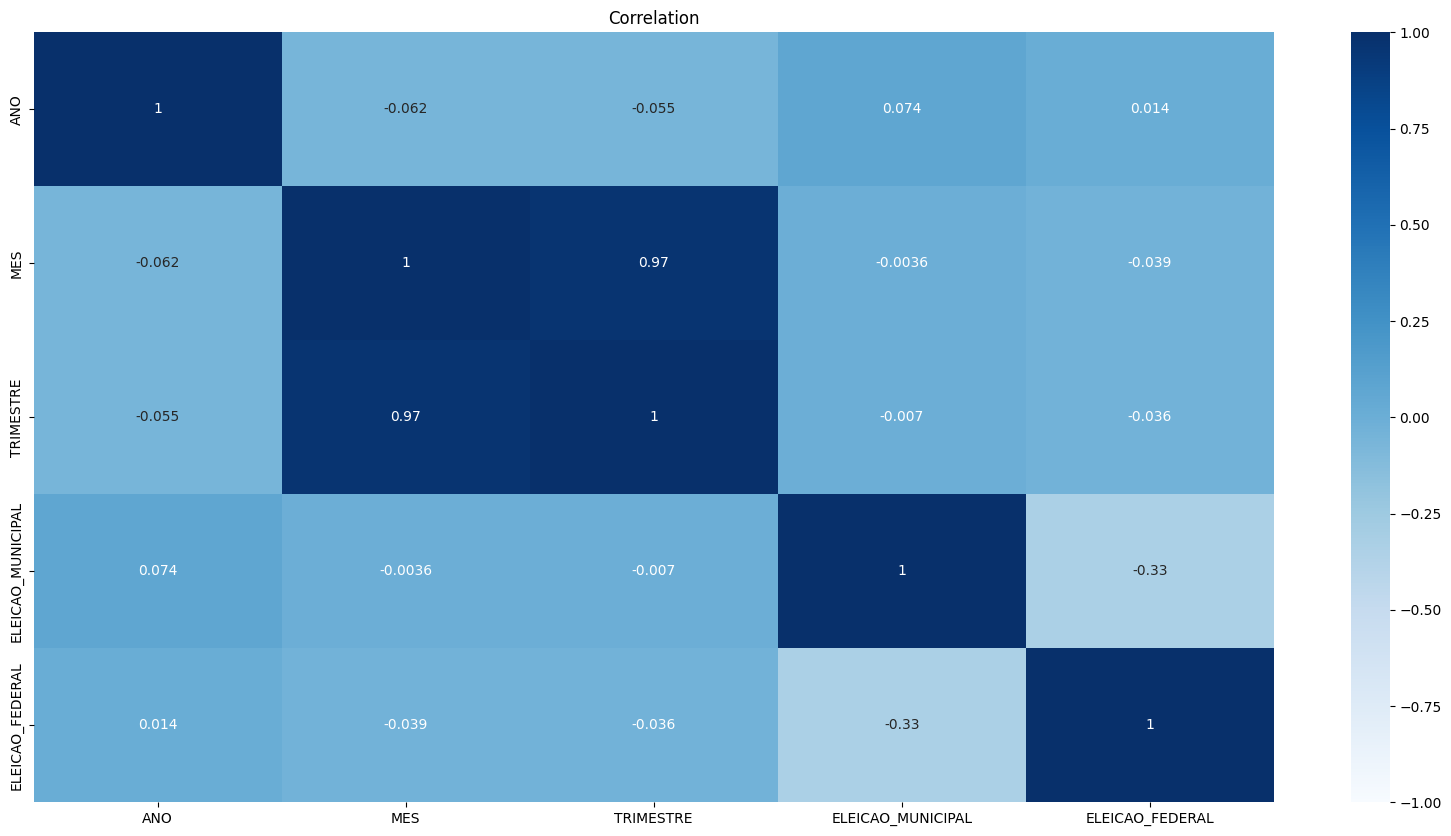

In [104]:
plt.figure(figsize = (20,10))
plt.title('Correlation')
sns.heatmap(data.corr(), 
            annot = True, 
            vmin = -1, 
            cmap = 'Blues'
           );
#plt.savefig("../Correlation1.png", dpi = 600 )

Alteração das colunas VARIACAO_DOLAR, INFLACAO, PIB, QUANTIDADE, VALOR dtype object para float

In [105]:
data['VARIACAO_DOLAR'] =data['VARIACAO_DOLAR'].apply(lambda x: x.replace(',', '.')).astype('float')
data['INFLACAO'] =data['INFLACAO'].apply(lambda x: x.replace(',', '.')).astype('float')
data['PIB'] =data['PIB'].apply(lambda x: x.replace(',', '.')).astype('float')
data['QUANTIDADE'] =data['QUANTIDADE'].apply(lambda x: x.replace(',', '.')).astype('float')
data['VALOR'] =data['VALOR'].apply(lambda x: x.replace(',', '.')).astype('float')

Alteração das colunas ANO e MES para string

In [106]:
data["ANO"] = data["ANO"].astype("str")
data["MES"] = data["MES"].astype("str")

ANALISANDO OS OUTLIERS

Plot valor vendido por ano

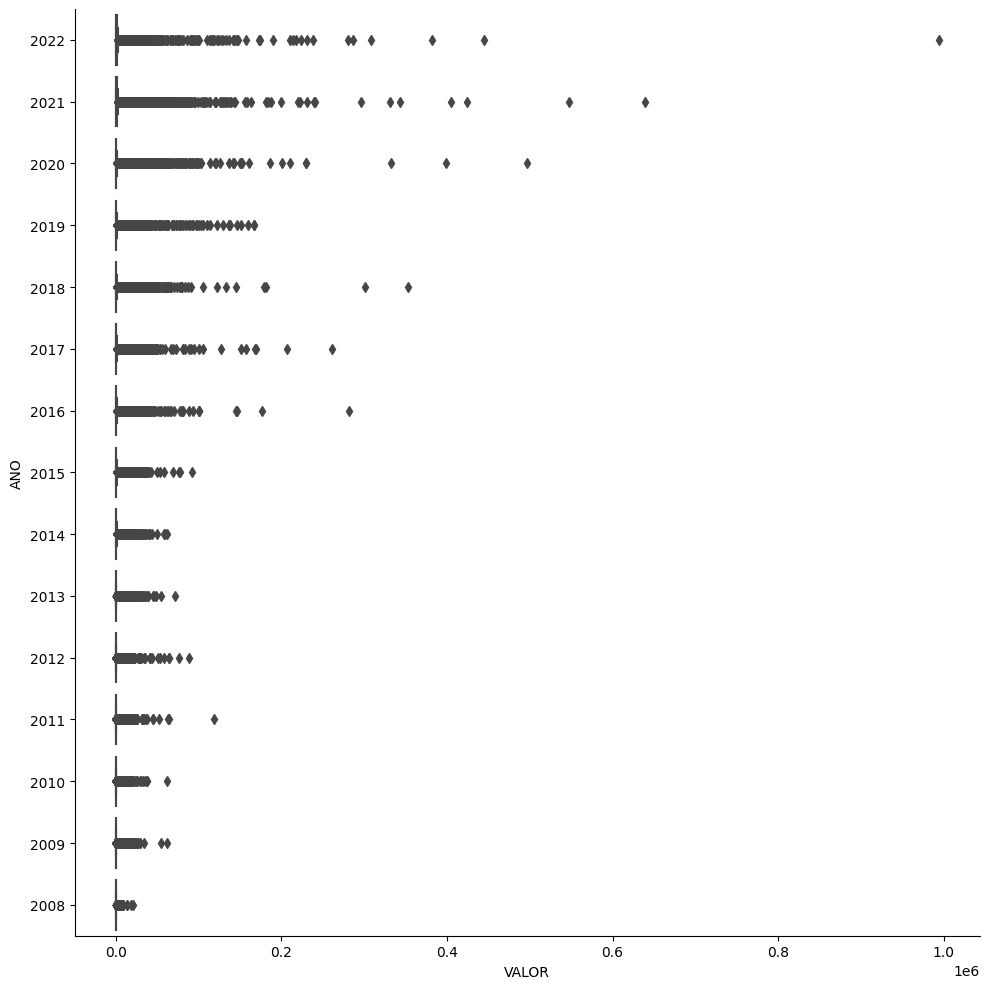

In [107]:
sns.catplot(y="ANO", x="VALOR",
                data=data.sort_values(by='ANO', ascending=False), kind="box",
                height=10, orient='h');

<AxesSubplot:xlabel='VALOR'>

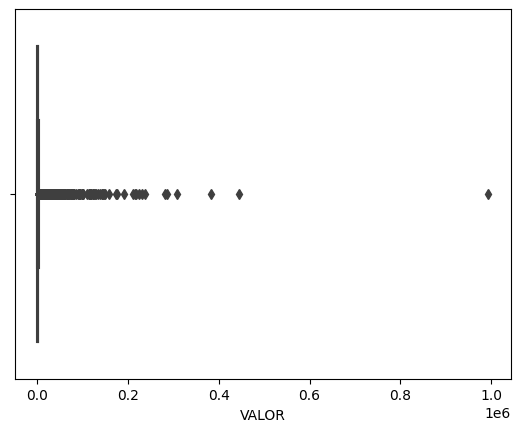

In [108]:
sns.boxplot(x='VALOR', data=data[data['ANO'] == '2022'], orient='h')

In [109]:
data[data['ANO'] == '2022'].VALOR.describe()

count     25665.000000
mean       1896.640005
std       10626.287601
min           0.030000
25%         155.430000
50%         419.500000
75%        1214.850000
max      994005.000000
Name: VALOR, dtype: float64

In [110]:
mask_2022_v_2000 = (data['ANO']=='2022') & (data['VALOR'] >=2000)
data_2022_outliers = data.loc[mask_2022_v_2000, :]
data_2022_outliers

,ANO,MES,TRIMESTRE,GRUPO,DESCRICAO_GRUPO,FAMILIA,DESCRICAO_FAMILIA,UF,CIDADE,ELEICAO_MUNICIPAL,ELEICAO_FEDERAL,VARIACAO_DOLAR,INFLACAO,PIB,QUANTIDADE,VALOR
925,2022,2,1,03,MEDICAMENTOS,03.01,CAPSULA/COMPRIMIDOS,SC,ANITA GARIBALDI,0,1,-5.763944,6.7,2.1,301.0,3792.20
930,2022,7,3,03,MEDICAMENTOS,03.01,CAPSULA/COMPRIMIDOS,SC,ANITA GARIBALDI,0,1,-5.763944,6.7,2.1,620.0,2276.00
1491,2022,2,1,03,MEDICAMENTOS,03.02,INJETAVEIS E POS LIOFILIZADOS,SC,CHAPECO,0,1,-5.763944,6.7,2.1,111.0,21904.52
3618,2022,3,1,01,PRODUTOS PARA SAUDE,01.04,MICROPORE/ESPARADRAPO,SC,CRICIUMA,0,1,-5.763944,6.7,2.1,117.0,3343.59
3619,2022,6,2,03,MEDICAMENTOS,03.02,INJETAVEIS E POS LIOFILIZADOS,SC,CRICIUMA,0,1,-5.763944,6.7,2.1,53.0,10958.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573083,2022,7,3,01,PRODUTOS PARA SAUDE,01.02,SERINGAS DESCARTAVEIS,SC,BLUMENAU,0,1,-5.763944,6.7,2.1,110.0,4400.00
573084,2022,7,3,07,SANEANTES,07.01,ASSEPSIA TÓPICA,SC,BALNEARIO CAMBORIU,0,1,-5.763944,6.7,2.1,122.0,12887.52
573085,2022,5,2,01,PRODUTOS PARA SAUDE,01.12,FISIOTERAPIA,SC,BALNEARIO CAMBORIU,0,1,-5.763944,6.7,2.1,108.0,3575.41
573087,2022,5,2,01,PRODUTOS PARA SAUDE,01.02,SERINGAS DESCARTAVEIS,SC,BALNEARIO CAMBORIU,0,1,-5.763944,6.7,2.1,42450.0,4350.00


Criação de uma nova coluna DATA concatenando o mês e o ano e convertendo para datetime

In [111]:
s_mes = data.MES
data["MES"] = s_mes.str.zfill(2)
data['DATA']= '01' + data.MES + data.ANO
data['DATA']=pd.to_datetime(data['DATA'], format='%d%m%Y')
data[['ANO','MES','DATA']]

,ANO,MES,DATA
0,2014,02,2014-02-01
1,2014,02,2014-02-01
2,2014,05,2014-05-01
3,2014,04,2014-04-01
4,2014,04,2014-04-01
...,...,...,...
573113,2015,02,2015-02-01
573114,2015,02,2015-02-01
573115,2022,01,2022-01-01
573116,2016,12,2016-12-01


Criando mascara para definir se é ano eleitoral ou não

In [112]:
mask_el_fed = data.ELEICAO_FEDERAL == 1
dt_el_fed = data.loc[mask_el_fed, ['ANO']]

mask_el_mun = data.ELEICAO_MUNICIPAL == 1
dt_el_mun = data.loc[mask_el_mun, ['ANO']]

print('Anos eleitorais:', dt_el_fed.ANO.unique(), dt_el_mun.ANO.unique() )

Anos eleitorais: ['2014' '2010' '2018' '2022'] ['2016' '2020' '2012' '2008']


Criando de um dicionario e nova coluna classificando se é ano eleitoral ou não

In [113]:
ano_eleitoral = { "2008": 1,
                 "2009": 0,
                 "2010": 1,
                 "2011": 0,
                 "2012": 1,
                 "2013": 0,
                 "2014": 1,
                 "2015": 0,
                 "2016": 1,
                 "2017": 0,
                 "2018": 1,
                 "2019": 0,
                 "2020": 1,
                 "2021": 0,
                 "2022": 1
         }

data["ANO_ELEITORAL"] = data.ANO.map(ano_eleitoral)
data["ANO_ELEITORAL"] = data["ANO_ELEITORAL"].astype("category")

Verificando a nova coluna ANO_ELEITORAL

In [114]:
data[['ANO','ELEICAO_FEDERAL', 'ELEICAO_MUNICIPAL', 'ANO_ELEITORAL']]

,ANO,ELEICAO_FEDERAL,ELEICAO_MUNICIPAL,ANO_ELEITORAL
0,2014,1,0,1
1,2014,1,0,1
2,2014,1,0,1
3,2014,1,0,1
4,2014,1,0,1
...,...,...,...,...
573113,2015,0,0,0
573114,2015,0,0,0
573115,2022,1,0,1
573116,2016,0,1,1


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573118 entries, 0 to 573117
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ANO                573118 non-null  object        
 1   MES                573118 non-null  object        
 2   TRIMESTRE          573118 non-null  int64         
 3   GRUPO              573118 non-null  object        
 4   DESCRICAO_GRUPO    573118 non-null  object        
 5   FAMILIA            573118 non-null  object        
 6   DESCRICAO_FAMILIA  573118 non-null  object        
 7   UF                 573118 non-null  object        
 8   CIDADE             573118 non-null  object        
 9   ELEICAO_MUNICIPAL  573118 non-null  int64         
 10  ELEICAO_FEDERAL    573118 non-null  int64         
 11  VARIACAO_DOLAR     573118 non-null  float64       
 12  INFLACAO           573118 non-null  float64       
 13  PIB                573118 non-null  float64 

##################################################################################

Agrupamento por Valor e Data

In [116]:
vendasgb = data.groupby('DATA')['VALOR'].sum().reset_index()
vendasgb = data.set_index('DATA')

Criação de novo dataframe df_vendas_mes  downsampling   com resamplin

In [117]:
df_vendas_mes = vendasgb['VALOR'].resample('MS').mean().to_frame();
df_vendas_mes.head(2)

,VALOR
DATA,
2008-12-01,381.556272
2009-01-01,255.186640


<Figure size 400x300 with 0 Axes>

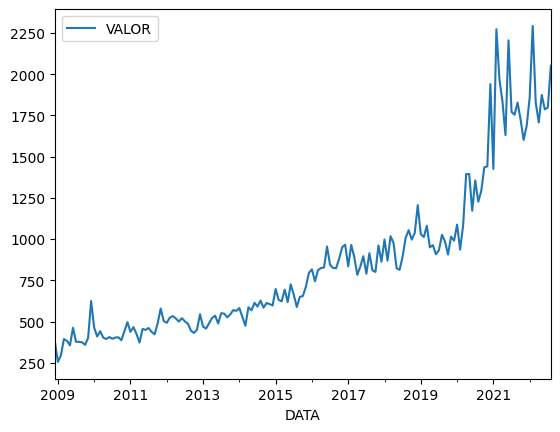

In [118]:
plt.figure(figsize=(4,3)); 
df_vendas_mes.plot();
plt.show()

#################################################################

# ANÁLISE COM MODELOS SIMPLES

# 1- Tendência Linear

In [120]:
df_vendas_mes["DATAINDEX"] = pd.Series(np.arange(len(df_vendas_mes['VALOR'])), index = df_vendas_mes.index)
df_vendas_mes.DATAINDEX.head(3)

DATA
2008-12-01    0
2009-01-01    1
2009-02-01    2
Freq: MS, Name: DATAINDEX, dtype: int32

In [121]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_vendas_mes, test_size = 12, random_state = 42, shuffle = False)

In [122]:
import statsmodels.api as sm
sm.OLS.from_formula

<bound method Model.from_formula of <class 'statsmodels.regression.linear_model.OLS'>>

In [123]:
import statsmodels.formula.api as smf
model_linear = smf.ols(formula = 'VALOR ~ DATAINDEX', data = df_train).fit()

In [124]:
df_train["LinearTrend"] = model_linear.predict(df_train.DATAINDEX)
df_test["LinearTrend"] = model_linear.predict(df_test.DATAINDEX)

C:\Users\Andreia Bácic\AppData\Local\Temp\ipykernel_82584\352366883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["LinearTrend"] = model_linear.predict(df_train.DATAINDEX)
C:\Users\Andreia Bácic\AppData\Local\Temp\ipykernel_82584\352366883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["LinearTrend"] = model_linear.predict(df_test.DATAINDEX)


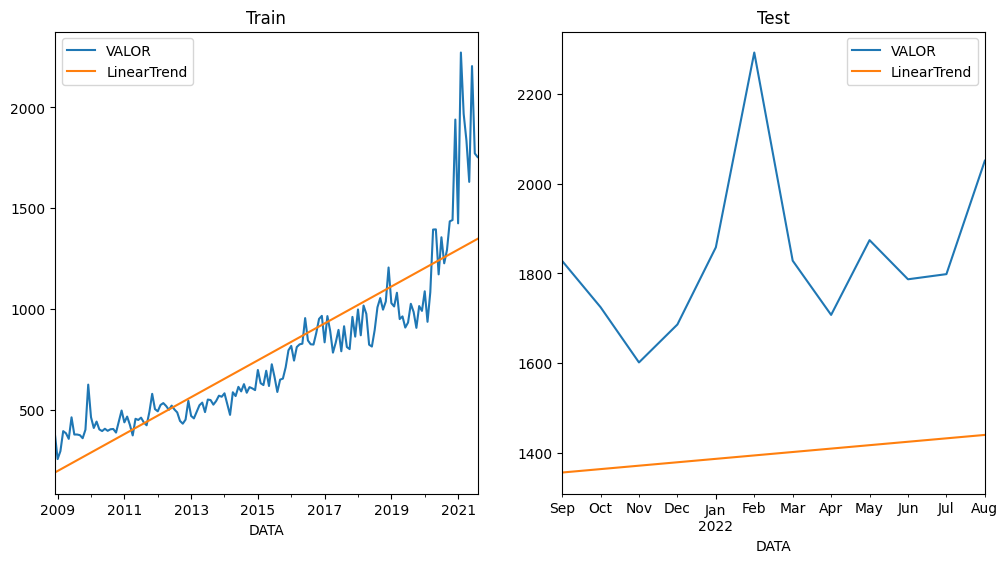

In [125]:
fig, axes = plt.subplots(1, 2,figsize = (12, 6))
df_train.plot(kind = "line", y = ["VALOR","LinearTrend"], ax = axes[0], title = 'Train');
df_test.plot(kind = "line", y = ["VALOR","LinearTrend"], ax = axes[1], title = 'Test');
plt.show()

Calculamos o desempenho com RMSE

In [126]:
df_Results = pd.DataFrame(columns = ["Model", "RMSE"])
df_Results

,Model,RMSE


In [127]:
def RMSE(predicted, actual):
	mse = (predicted - actual) ** 2
	rmse = np.sqrt(mse.sum() / mse.count())
	return rmse

In [128]:
model_RMSE = RMSE(df_test.LinearTrend, df_test.VALOR)

In [129]:
df_Results.loc[0, "Model"] = "LinearTrend"
df_Results.loc[0, "RMSE"] = model_RMSE
df_Results.head()

,Model,RMSE
0,LinearTrend,470.040611


In [130]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALOR   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     489.3
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           3.16e-49
Time:                        15:48:53   Log-Likelihood:                -1017.5
No. Observations:                 153   AIC:                             2039.
Df Residuals:                     151   BIC:                             2045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    188.5584     30.304      6.222      0.000     128.683     248.434
DATAINDEX      7.6261      0.345     22.121      0.000       6.945       8.307
==============================================================================
Omnibus:                       96.175   Durbin-Watson:                   0.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.523
Skew:                           2.332   Prob(JB):                    4.24e-118
Kurtosis:                      10.939   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2 - Tendência quadrática

In [131]:
df_vendas_mes["DATAINDEX_SQ"] = df_vendas_mes["DATAINDEX"] ** 2
df_vendas_mes.DATAINDEX_SQ.head(3)

DATA
2008-12-01    0
2009-01-01    1
2009-02-01    4
Freq: MS, Name: DATAINDEX_SQ, dtype: int32

In [132]:
df_train, df_test = train_test_split(df_vendas_mes, test_size = 12, random_state = 42, shuffle = False)

In [133]:
model_quadratic = smf.ols('VALOR ~ DATAINDEX + DATAINDEX_SQ', data = df_train).fit()

In [134]:
df_train["QUADRATIC_TEND"] = model_quadratic.predict(df_train[["DATAINDEX","DATAINDEX_SQ"]])
df_test["QUADRATIC_TEND"] = model_quadratic.predict(df_test[["DATAINDEX","DATAINDEX_SQ"]])

C:\Users\Andreia Bácic\AppData\Local\Temp\ipykernel_82584\1245640898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["QUADRATIC_TEND"] = model_quadratic.predict(df_train[["DATAINDEX","DATAINDEX_SQ"]])
C:\Users\Andreia Bácic\AppData\Local\Temp\ipykernel_82584\1245640898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["QUADRATIC_TEND"] = model_quadratic.predict(df_test[["DATAINDEX","DATAINDEX_SQ"]])


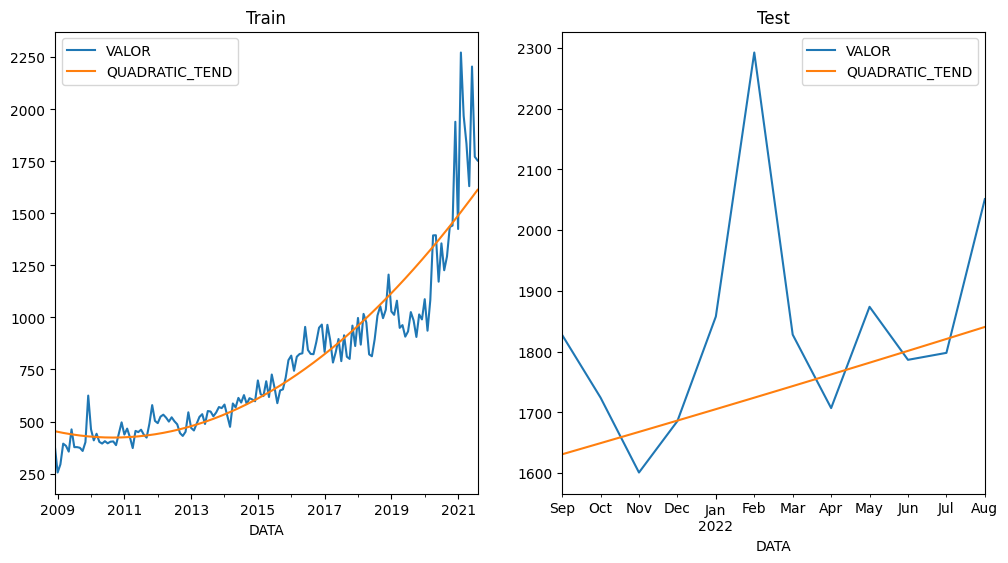

In [135]:
fig, axes = plt.subplots(1, 2,figsize = (12, 6))
df_train.plot(kind = "line", y = ["VALOR","QUADRATIC_TEND"], ax = axes[0], title = 'Train');
df_test.plot(kind = "line", y = ["VALOR","QUADRATIC_TEND"], ax = axes[1], title = 'Test');
plt.show()

In [136]:
model_RMSE = RMSE(df_test.QUADRATIC_TEND, df_test.VALOR)

In [137]:
df_Results.loc[1, "Model"] = "QUADRATIC_TEND"
df_Results.loc[1, "RMSE"] = model_RMSE
df_Results.head()

,Model,RMSE
0,LinearTrend,470.040611
1,QUADRATIC_TEND,195.46215


In [138]:
model_quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALOR   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     470.7
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           2.29e-65
Time:                        15:48:57   Log-Likelihood:                -976.25
No. Observations:                 153   AIC:                             1958.
Df Residuals:                     150   BIC:                             1968.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      453.5310     34.538     13.132      0.000     385.288     521.774
DATAINDEX       -2.9026      1.050     -2.765      0.006      -4.977      -0.828
DATAINDEX_SQ     0.0693      0.007     10.361      0.000       0.056       0.082
==============================================================================
Omnibus:                       69.790   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.193
Skew:                           1.500   Prob(JB):                     1.41e-94
Kurtosis:                      10.668   Cond. No.                     3.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3 -  Tendência com transformação logarítmica

In [139]:
df_train['LOG_VALOR'] = np.log(df_train['VALOR'])
df_test['LOG_VALOR'] = np.log(df_test['VALOR'])

C:\Users\Andreia Bácic\AppData\Local\Temp\ipykernel_82584\3265848764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['LOG_VALOR'] = np.log(df_train['VALOR'])
C:\Users\Andreia Bácic\AppData\Local\Temp\ipykernel_82584\3265848764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['LOG_VALOR'] = np.log(df_test['VALOR'])


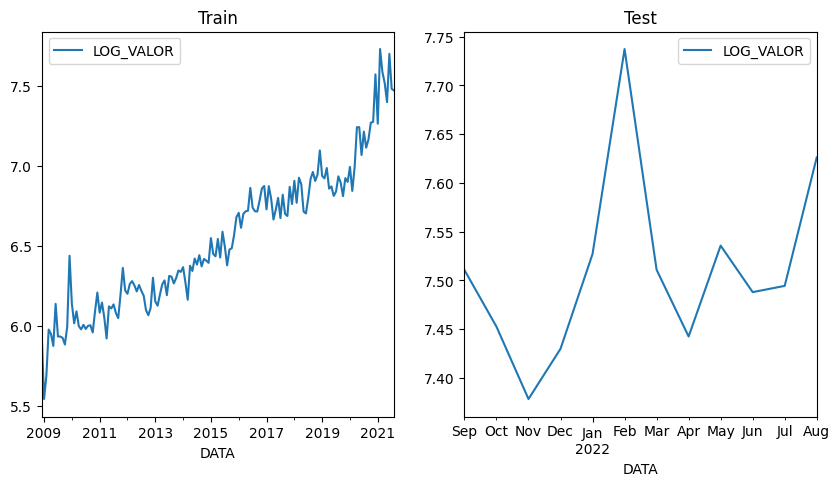

In [140]:
fig, axes = plt.subplots(1, 2,figsize = (10, 5))
df_train.plot(kind = "line", y = ["LOG_VALOR"], ax = axes[0], title = 'Train');
df_test.plot(kind = "line", y = ["LOG_VALOR"], ax = axes[1], title = 'Test');
plt.show()

In [141]:
model_log = smf.ols('LOG_VALOR ~ DATAINDEX ', data = df_train).fit()

In [142]:
df_train["LOG_TREND"] = model_log.predict(df_train[["DATAINDEX"]])
df_test["LOG_TREND"] = model_log.predict(df_test[["DATAINDEX"]])

C:\Users\Andreia Bácic\AppData\Local\Temp\ipykernel_82584\1162904048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["LOG_TREND"] = model_log.predict(df_train[["DATAINDEX"]])
C:\Users\Andreia Bácic\AppData\Local\Temp\ipykernel_82584\1162904048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["LOG_TREND"] = model_log.predict(df_test[["DATAINDEX"]])


In [143]:
df_train['BACK_LOG_TREND'] = np.exp(df_train['LOG_TREND'])
df_test['BACK_LOG_TREND'] = np.exp(df_test['LOG_TREND'])

C:\Users\Andreia Bácic\AppData\Local\Temp\ipykernel_82584\919872304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['BACK_LOG_TREND'] = np.exp(df_train['LOG_TREND'])
C:\Users\Andreia Bácic\AppData\Local\Temp\ipykernel_82584\919872304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['BACK_LOG_TREND'] = np.exp(df_test['LOG_TREND'])


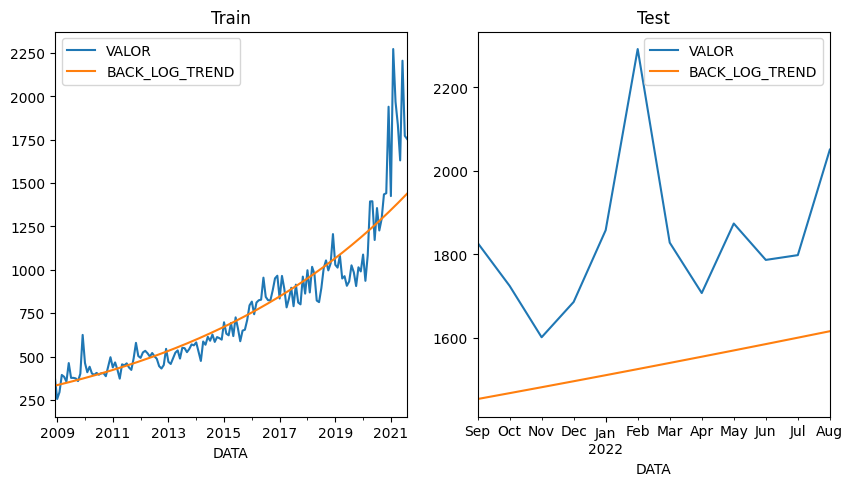

In [144]:
fig, axes = plt.subplots(1, 2,figsize = (10, 5))
df_train.plot(kind = "line", y = ["VALOR", "BACK_LOG_TREND"], ax = axes[0], title = 'Train');
df_test.plot(kind = "line", y = ["VALOR", "BACK_LOG_TREND"], ax = axes[1], title = 'Test');
plt.show()

In [145]:
model_RMSE = RMSE(df_test.BACK_LOG_TREND, df_test.VALOR)

In [146]:
df_Results.loc[2, "Model"] = "BACK_LOG_TREND"
df_Results.loc[2, "RMSE"] = model_RMSE
df_Results.head()

,Model,RMSE
0,LinearTrend,470.040611
1,QUADRATIC_TEND,195.46215
2,BACK_LOG_TREND,345.982005


# 4 - Single Exponential Smoothing

In [153]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#model_exp_smoothing_03 = SimpleExpSmoothing(df_train.VALOR).fit(smoothing_level = 0.3, optimized = False)
model_exp_smoothing_03 = SimpleExpSmoothing(df_train.VALOR).fit(smoothing_level = 0.3, optimized = False)
model_exp_smoothing_05 = SimpleExpSmoothing(df_train.VALOR).fit(smoothing_level = 0.5, optimized = False)
model_exp_smoothing_08 = SimpleExpSmoothing(df_train.VALOR).fit(smoothing_level = 0.8, optimized = False)

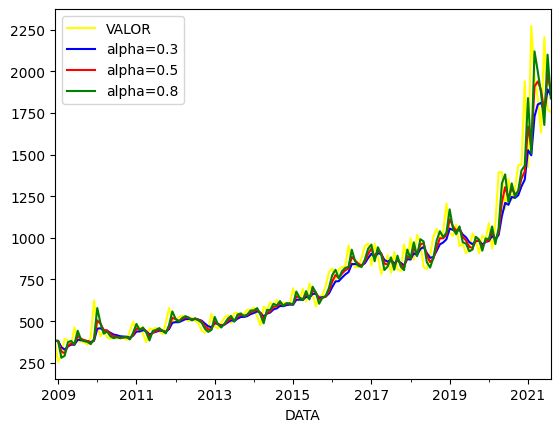

In [155]:
df_train.plot(kind = "line", y = "VALOR", color = 'yellow')
#model_exp_smoothing_03.fittedvalues.plot(label = "alpha=0.3", color = 'b');
model_exp_smoothing_03.fittedvalues.plot(label = "alpha=0.3", color = 'b');
model_exp_smoothing_05.fittedvalues.plot(label = "alpha=0.5", color = 'r');
model_exp_smoothing_08.fittedvalues.plot(label = "alpha=0.8", color = 'g');
plt.legend();

In [157]:
df_test["Simple_Smoothing_03"] = model_exp_smoothing_03.forecast(len(df_test))
df_test["Simple_Smoothing_05"] = model_exp_smoothing_05.forecast(len(df_test))
df_test["Simple_Smoothing_08"] = model_exp_smoothing_08.forecast(len(df_test))

C:\Users\Andreia Bácic\AppData\Local\Temp\ipykernel_82584\3074524327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Simple_Smoothing_03"] = model_exp_smoothing_03.forecast(len(df_test))
C:\Users\Andreia Bácic\AppData\Local\Temp\ipykernel_82584\3074524327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Simple_Smoothing_05"] = model_exp_smoothing_05.forecast(len(df_test))
C:\Users\Andreia Bácic\AppData\Local\Temp\ipykernel_82584\3074524327.py:3: SettingWithCopyWarning: 
A value is t

In [158]:
model_RMSE_3 = RMSE(df_test["Simple_Smoothing_03"], df_test.VALOR)
model_RMSE_5 = RMSE(df_test["Simple_Smoothing_05"], df_test.VALOR)
model_RMSE_8 = RMSE(df_test["Simple_Smoothing_08"], df_test.VALOR)

In [160]:
# Calculamos o RMSE e armazenamos os resultados
df_Results.loc[3, "Model"] = "SIMPLE SMOOTHINF a=0.3"; df_Results.loc[3, "RMSE"] = model_RMSE_3
df_Results.loc[4, "Model"] = "SIMPLE SMOOTHINF a=0.5"; df_Results.loc[4, "RMSE"] = model_RMSE_5
df_Results.loc[5, "Model"] = "SIMPLE SMOOTHINF a=0.8"; df_Results.loc[5, "RMSE"] = model_RMSE_8
df_Results

,Model,RMSE
0,LinearTrend,470.040611
1,QUADRATIC_TEND,195.46215
2,BACK_LOG_TREND,345.982005
3,SIMPLE SMOOTHINF a=0.3,175.322607
4,SIMPLE SMOOTHINF a=0.5,176.199559
5,SIMPLE SMOOTHINF a=0.8,186.866475
